## Introduction
This analysis focuses on studying the impact of electronegative impurities in certain environments. We will go through a series of calculations and visual representations to understand this phenomenon better.

# Electronegative Impurities Simulations

Simulations of the electronegative contaminent control. From the work of Kaixuan Ni

In [1]:
import elec_neg_functions as enf
import numpy as np
import matplotlib.pyplot as plt


# Global Constants
M_nEXO = 5000  # in kg, LXe mass in nEXO
p_LXe = 5.5e-3  # in kg/liter, LXe density
M_XPM = 1.53 # in Kg, LXe mass in the XPM
C_el = 300 # in ppb/μs, constant for the XPM fits
T_room = 293 # in Kelvin, room temperature
T_LXe = 164 # in Kelvin, LXe temperature

## Electron lifetime prediction



In [23]:
# Constants for this section
n0 = 1  # in ppb, initial impurity concentration
F = 200/60  # in liter/sec, xenon gas circulation flow rate
eta = 1.0  # purification efficiency
alpha = 0.3  # in ms, EXO-200 value, field dependant factor

num_seconds = 60*24*60*60  # total seconds in the number of days
seconds = np.arange(0, num_seconds+1)


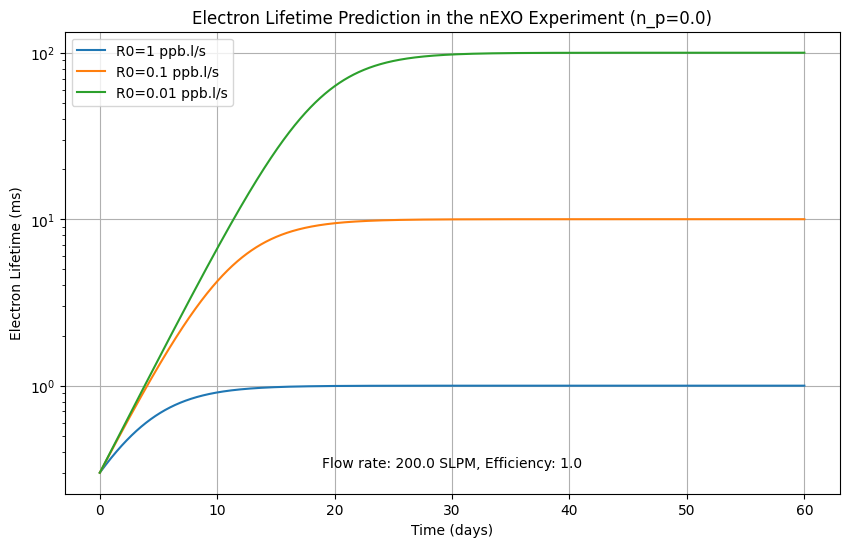

In [26]:
# Keeping N_p constant, but with multiple R0 values
n_p= 0.0  # in ppb, purifier output impurity concentration
R0_values = [1, 0.1, 0.01] # in ppb liter/sec, total out-diffusion rate

# Prepare a plot with a specified figure size
plt.figure(figsize=(10, 6))

# Calculate electron lifetime and plot for each R0
for R0 in R0_values:
    electron_lifetimes = [enf.electron_lifetime(sec, M_nEXO, p_LXe, n0, F, eta, R0, alpha, n_p) for sec in seconds]

    # Plotting, while dividing 'seconds' by the number of seconds in a day to convert to days
    plt.plot(seconds / (24*60*60), electron_lifetimes, label=f'R0={R0} ppb.l/s')

# Configuring the plot's settings
plt.title(f'Electron Lifetime Prediction in the nEXO Experiment (n_p={n_p})')
plt.xlabel('Time (days)')
plt.ylabel('Electron Lifetime (ms)')
plt.yscale('log')
plt.legend()
plt.text(0.5, 0.05, f'Flow rate: {F*60} SLPM, Efficiency: {eta}', ha='center', va='bottom', transform=plt.gca().transAxes)
plt.grid(True)

plt.show()

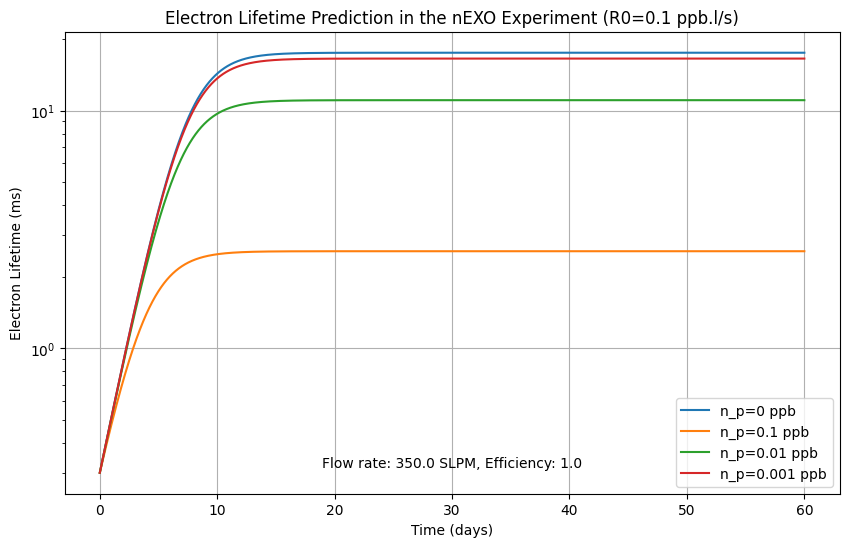

In [29]:
# This time keeping R0 constant, but with multiple n_p values
F = 350/60  # in liter/sec, xenon gas circulation flow rate
R0=0.1 # in ppb liter/sec, total out-diffusion rate
n_p_values = [0, 0.1, 0.01, 0.001] # in ppb, purifier output impurity concentration

# Prepare a plot with a specified figure size
plt.figure(figsize=(10, 6))

# Calculate electron lifetime and plot for each n_p
for n_p in n_p_values:
    electron_lifetimes = [enf.electron_lifetime(sec, M_nEXO, p_LXe, n0, F, eta, R0, alpha, n_p) for sec in seconds]

    # Plotting, while dividing 'seconds' by the number of seconds in a day to convert to days
    plt.plot(seconds / (24*60*60), electron_lifetimes, label=f'n_p={n_p} ppb')

# Configuring the plot's settings
plt.title(f'Electron Lifetime Prediction in the nEXO Experiment (R0={R0} ppb.l/s)')
plt.xlabel('Time (days)')
plt.ylabel('Electron Lifetime (ms)')
plt.yscale('log')
plt.legend()
plt.text(0.5, 0.05, f'Flow rate: {F*60} SLPM, Efficiency: {eta}', ha='center', va='bottom', transform=plt.gca().transAxes)
plt.grid(True)

plt.show()

## XPM measurement fits

Fits for the measurements made by the Xenon Purity Monitor at SLAC.

### Re-alalyzing XPM Measurement

Data from "control3" (empty XPM) in April (run start 2-10-17). From P.C. Rowson et al., Xenon Purity Monitor at SLAC

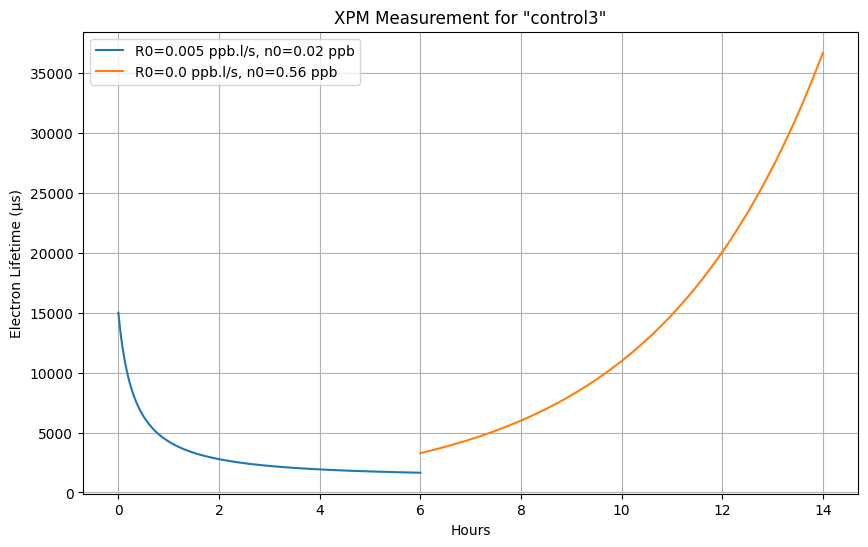

In [62]:
#Assuming
n_p= 0.0  # in ppb, purifier output impurity concentration
alpha = 0.3*1e3  # in μs, EXO-200 value, field dependant factor

#Given constants for first fit
F = 1.4/60  # in liter/sec, xenon gas circulation flow rate
eta = 1.0; eta_error=0.3  # purification efficiency
R0 = 5.0e-3; R0_error=1.0e-3 # in ppb liter/sec, total out-diffusion rate
n0 = 0.02; n0_error=0.02  # in ppb, initial impurity concentration
seconds = np.arange(0, 6*60*60+1)
seconds= np.arange(0, 6*60*60+1)

# Prepare a plot with a specified figure size
plt.figure(figsize=(10, 6))

# Calculate electron lifetime and plot for each R0
electron_lifetimes = [enf.electron_lifetime(sec, M_XPM, p_LXe, n0, F, eta, R0, alpha, n_p) for sec in seconds]
plt.plot(seconds / (60*60), electron_lifetimes, label=f'R0={R0} ppb.l/s, n0={n0} ppb')

#--------------------------------------------------------------------------------------------------------------------------------

# Given constants for second fit
R0 = 0.0e-4; R0_error=7.4e-4 # in ppb liter/sec, total out-diffusion rate
n0 = 0.56; n0_errors=0.12  # in ppb, initial impurity concentration
seconds = np.arange(6*60*60+1, 14*60*60+1)

# Calculate electron lifetime and plot for each R0
electron_lifetimes = [enf.electron_lifetime(sec, M_XPM, p_LXe, n0, F, eta, R0, alpha, n_p) for sec in seconds]
plt.plot(seconds / (60*60), electron_lifetimes, label=f'R0={R0} ppb.l/s, n0={n0} ppb')

# Configuring the plot's settings
plt.title('XPM Measurement for "control3"')
plt.xlabel('Hours')
plt.ylabel('Electron Lifetime (μs)')
plt.legend()
plt.grid(True)

plt.show()

Results might be different here than the ones shown on the data fits becauses of the assumed values of alpha and n_p for the XPM. When the data will be available, a fit function will be added, to do this correctly.

### Exemple with Torlon

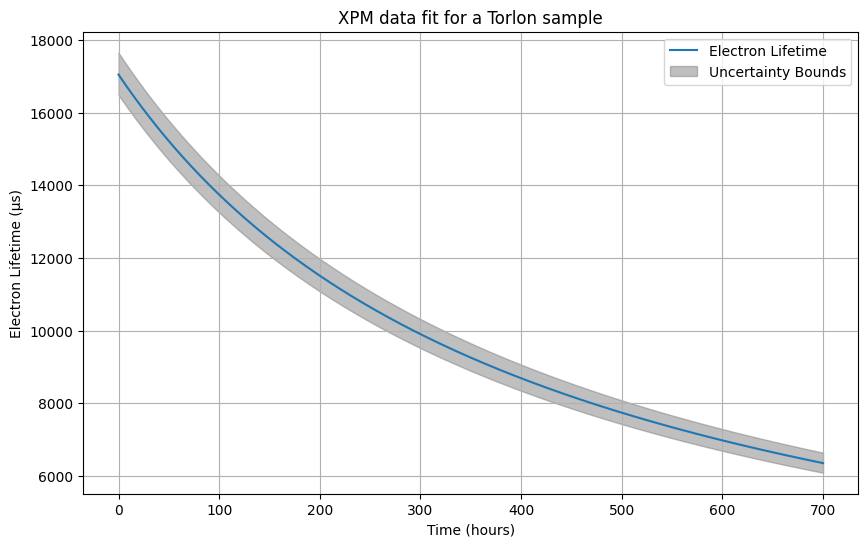

In [7]:
# Constants
n0=0.0176; n0_error=6e-4
R0=3.27e-6; R0_error=0.16e-6
second = np.arange(0, (700*60*60)+1)

# Prepare a plot with a specified figure size
plt.figure(figsize=(10, 6))

# Calculate electron lifetime and its bounds
electron_lifetimes, lower_bounds, upper_bounds = enf.XPM_electron_lifetime_fit(second, C_el, n0, R0, p_LXe, M_XPM, n0_error, R0_error)

# Plotting
plt.plot(second / (60*60), electron_lifetimes, label='Electron Lifetime')
plt.fill_between(second / (60*60), lower_bounds, upper_bounds, color='grey', alpha=0.5, label='Uncertainty Bounds')

# Configuring the plot's settings
plt.title('XPM data fit for a Torlon sample')
plt.xlabel('Time (hours)')
plt.ylabel('Electron Lifetime (μs)')
plt.legend()
plt.grid(True)

plt.show()

### Exemple with Ultem.

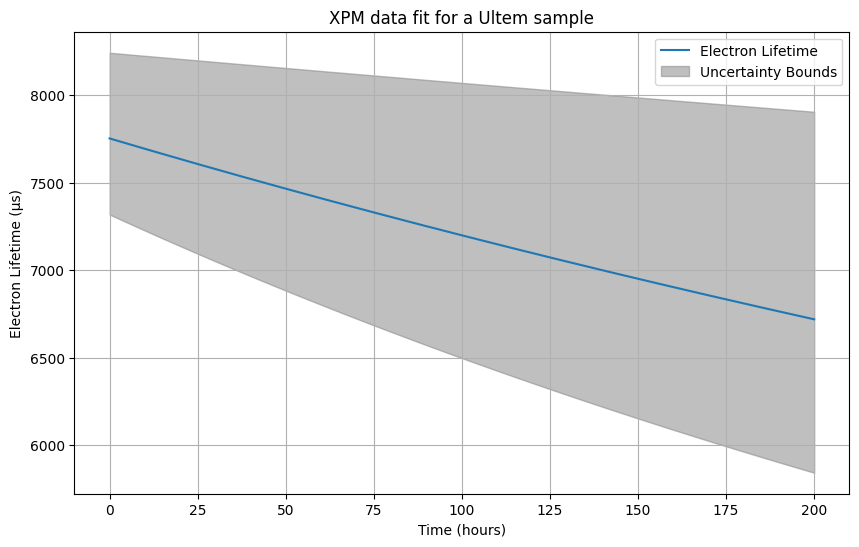

In [8]:
# Constants
n0=0.0387; n0_error=2.3e-3
R0=2.3e-6; R0_error=1.7e-6
second = np.arange(0, (200*60*60)+1)

# Prepare a plot with a specified figure size
plt.figure(figsize=(10, 6))

# Calculate electron lifetime and its bounds, then plot
electron_lifetimes, lower_bounds, upper_bounds = enf.XPM_electron_lifetime_fit(second, C_el, n0, R0, p_LXe, M_XPM, n0_error, R0_error)

# Plotting the main line
plt.plot(second / (60*60), electron_lifetimes, label='Electron Lifetime')
plt.fill_between(second / (60*60), lower_bounds, upper_bounds, color='grey', alpha=0.5, label='Uncertainty Bounds')

# Configuring the plot's settings
plt.title('XPM data fit for a Ultem sample')
plt.xlabel('Time (hours)')
plt.ylabel('Electron Lifetime (μs)')
plt.legend()
plt.grid(True)

plt.show()

## Modelling outgassing of impurities

From Ako Jamil's thesis (section 4.2).

### Desorption from Stainless Steel

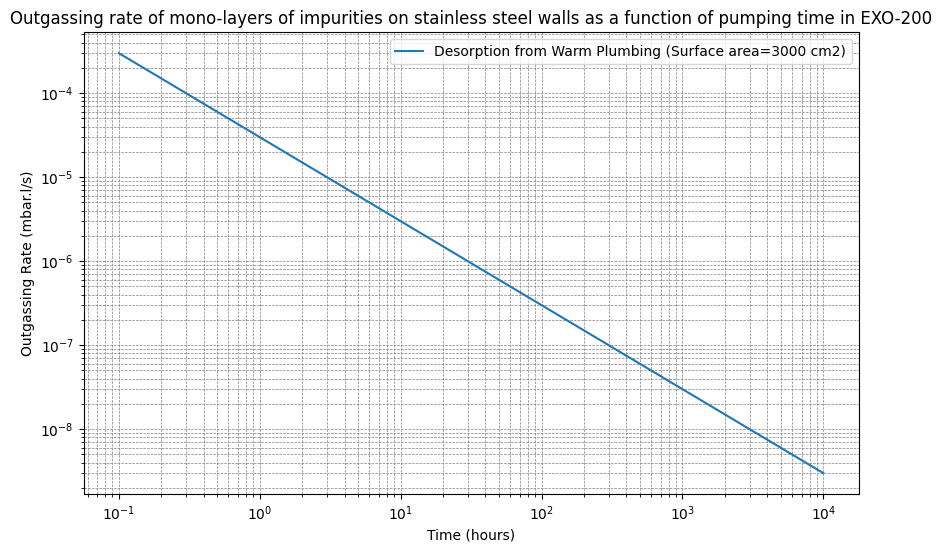

In [2]:
# Constant
tau0=1e-13 # in sec, residence time of an impurity
area=3000 #in cm2, area of the sample
J=1e-8 # in mbar.L.s-1.cm-1, outgassing rate of H2O from an unbaked stainless steel surface that has been pumped on for 1h
t = np.arange(1e-1*60*60, (1e4*60*60)+1, 60) # in seconds
t0=1*60*60 # constant value from Ako Jamil's thesis page 89

# Prepare a plot with a specified figure size
plt.figure(figsize=(10, 6))

# Calculate outgassing rate
J_total = J * area * t0/t

# Plotting, while dividing 'seconds' by the number of seconds in a day to convert to days
plt.plot(t / (60*60), J_total, label=f'Desorption from Warm Plumbing (Surface area={area} cm2)')

# Configuring the plot's settings
plt.title(f'Outgassing rate of mono-layers of impurities on stainless steel walls as a function of pumping time in EXO-200')
plt.xlabel('Time (hours)')
plt.ylabel('Outgassing Rate (mbar.l/s)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(which='both', linestyle='--', linewidth='0.5', color='gray')

plt.show()

**Different results from ako's, why?? See page 89**

### Outgassing from plastics

In [12]:
# Constants
C0 = 943 / 1e9  # Initial oxygen concentration in PTFE (ppb)
D0 = 31.4 / 1e8  # Diffusion constant at infinite temperature (cm^2/s)
EA = 0.17 * 1.602176634e-19  # Activation energy (Joules)
D = 0.15  # Thickness of PTFE (cm)
RADIUS = 18.3  # Radius of the material (cm)
HEIGHT = 40  # Height of the material (cm)

# Surface area calculation
surface_area = 2 * np.pi * RADIUS * HEIGHT  # Surface area of contact (cm^2)

# Time arrays (incremented every hour)
t_short = np.arange(0, (2 * 24 * 60 * 60) + 1, 60 * 60)  # seconds
t_long = np.arange((2 * 24 * 60 * 60) + 1, (20 * 24 * 60 * 60) + 1, 60 * 60)  # seconds
t = np.arange(0, (20 * 24 * 60 * 60) + 1, 60 * 60) # seconds

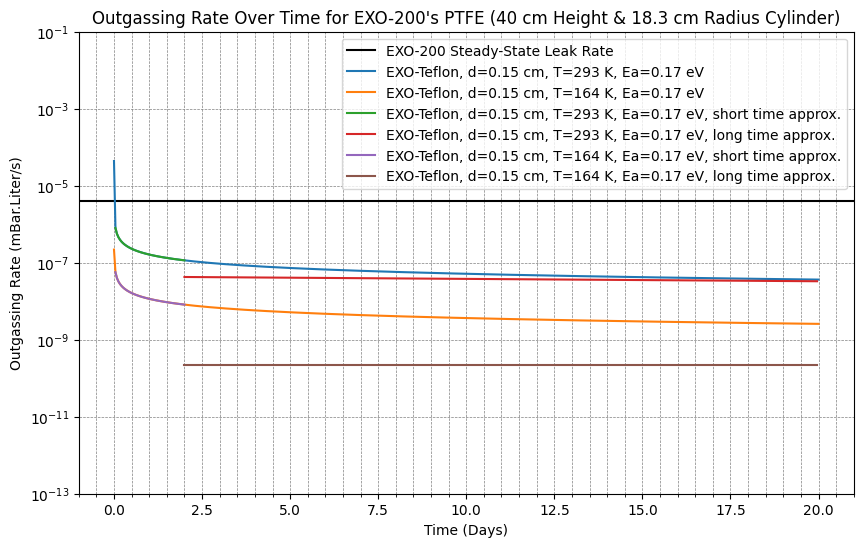

In [13]:
# Calculate outgassing rates using the optimized function
outgassing_rate_recirculated = [enf.plastics_outgassing(C0, D0, EA, T_room, D, sec, surface_area) for sec in t]
outgassing_rate_cold = [enf.plastics_outgassing(C0, D0, EA, T_LXe, D, sec, surface_area) for sec in t]

outgassing_rate_recirculated_approx = [enf.plastics_outgassing_approximation(C0, D0, EA, T_room, sec, D, surface_area, 'short') for sec in t_short]
outgassing_rate_recirculated_approxlong = [enf.plastics_outgassing_approximation(C0, D0, EA, T_room, sec, D, surface_area, 'long') for sec in t_long]

outgassing_rate_cold_approx = [enf.plastics_outgassing_approximation(C0, D0, EA, T_LXe, sec, D, surface_area, 'short') for sec in t_short]
outgassing_rate_cold_approxlong = [enf.plastics_outgassing_approximation(C0, D0, EA, T_LXe, sec, D, surface_area, 'long') for sec in t_long]

# Plotting
plt.figure(figsize=(10, 6))
plt.axhline(y=4e-6, color='black', linestyle='-', label="EXO-200 Steady-State Leak Rate")  # Adds a horizontal line across the axis at y = 4*10^-6
plt.plot(t / (24 * 60 * 60), outgassing_rate_recirculated, label=f'EXO-Teflon, d={D} cm, T={T_room} K, Ea={EA / 1.602176634e-19} eV')
plt.plot(t / (24 * 60 * 60), outgassing_rate_cold, label=f'EXO-Teflon, d={D} cm, T={T_LXe} K, Ea={EA / 1.602176634e-19} eV')

plt.plot(t_short / (24 * 60 * 60), outgassing_rate_recirculated_approx, label=f'EXO-Teflon, d={D} cm, T={T_room} K, Ea={EA / 1.602176634e-19} eV, short time approx.')
plt.plot(t_long / (24 * 60 * 60), outgassing_rate_recirculated_approxlong, label=f'EXO-Teflon, d={D} cm, T={T_room} K, Ea={EA / 1.602176634e-19} eV, long time approx.')

plt.plot(t_short / (24 * 60 * 60), outgassing_rate_cold_approx, label=f'EXO-Teflon, d={D} cm, T={T_LXe} K, Ea={EA / 1.602176634e-19} eV, short time approx.')
plt.plot(t_long / (24 * 60 * 60), outgassing_rate_cold_approxlong, label=f'EXO-Teflon, d={D} cm, T={T_LXe} K, Ea={EA / 1.602176634e-19} eV, long time approx.')

plt.title('Outgassing Rate Over Time for EXO-200\'s PTFE (40 cm Height & 18.3 cm Radius Cylinder)')
plt.xlabel('Time (Days)')
plt.ylabel('Outgassing Rate (mBar.Liter/s)')
plt.yscale('log')
plt.legend()
plt.ylim(1e-13, 1e-1)
plt.grid(which='both', linestyle='--', linewidth='0.5', color='gray')
plt.minorticks_on()
plt.show()


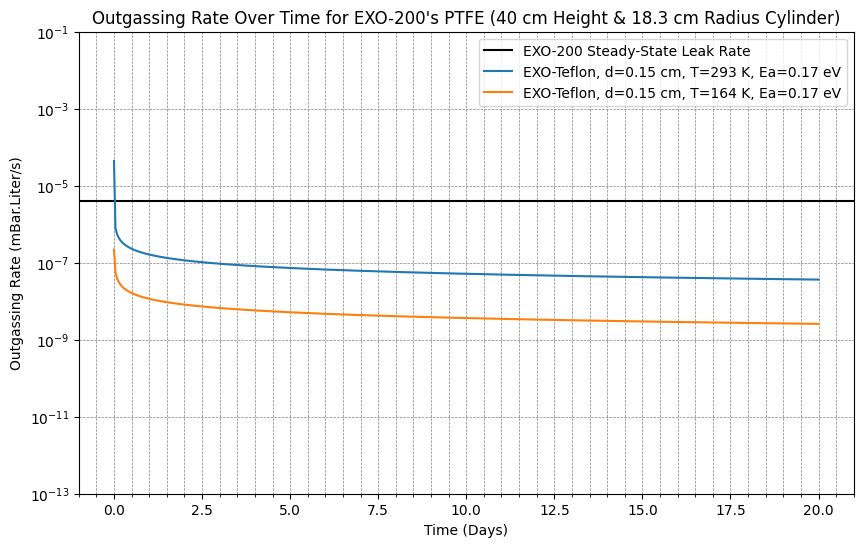

In [14]:
# Calculate outgassing rates using the optimized function
outgassing_rate_recirculated = [enf.plastics_outgassing(C0, D0, EA, T_room, D, sec, surface_area) for sec in t]
outgassing_rate_cold = [enf.plastics_outgassing(C0, D0, EA, T_LXe, D, sec, surface_area) for sec in t]

# Plotting
plt.figure(figsize=(10, 6))
plt.axhline(y=4e-6, color='black', linestyle='-', label="EXO-200 Steady-State Leak Rate")  # Adds a horizontal line across the axis at y = 4*10^-6
plt.plot(t / (24 * 60 * 60), outgassing_rate_recirculated, label=f'EXO-Teflon, d={D} cm, T={T_room} K, Ea={EA / 1.602176634e-19} eV')
plt.plot(t / (24 * 60 * 60), outgassing_rate_cold, label=f'EXO-Teflon, d={D} cm, T={T_LXe} K, Ea={EA / 1.602176634e-19} eV')

plt.title('Outgassing Rate Over Time for EXO-200\'s PTFE (40 cm Height & 18.3 cm Radius Cylinder)')
plt.xlabel('Time (Days)')
plt.ylabel('Outgassing Rate (mBar.Liter/s)')
plt.yscale('log')
plt.legend()
plt.ylim(1e-13, 1e-1)
plt.grid(which='both', linestyle='--', linewidth='0.5', color='gray')
plt.minorticks_on()
plt.show()
